# Womens Clothing E-Commerce Reviews

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

1. Import pliku z danymi
2. Dodanie numerycznej kolumny dla ClassNameNUM
3. Usunięcie wolnych przestrzeni między słowami
4. Usunięcie pierwszej kolumny z numerem rekordu

In [3]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv") # wczytanie pliku z danymi
df['Class Name NUM'] = df['Class Name'].astype('category').cat.codes
df['AgeInterval'] = pd.cut(df['Age'], np.arange(start=0, stop=100, step=10))
df.columns = df.columns.str.replace(' ', '')
df = df.loc[:,'ClothingID':'AgeInterval']

In [4]:
def ocena (row):
    if row['Rating'] == 5 :
        return 'Ocena_pozytywna'
    if row['Rating'] == 4 :
        return 'Ocena_pozytywna'
    if row['Rating'] == 3 :
        return 'Ocena_neutralna'
    if row['Rating'] == 2 :
        return 'Ocena_negatywna'
    if row['Rating'] == 1 :
        return 'Ocena_negatywna'
    return 'Inna'

df['ocena'] = df.apply (lambda row: ocena(row), axis=1)
df.head()

,ClothingID,Age,Title,ReviewText,Rating,RecommendedIND,PositiveFeedbackCount,DivisionName,DepartmentName,ClassName,ClassNameNUM,AgeInterval,ocena
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,5,"(30, 40]",Ocena_pozytywna
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,3,"(30, 40]",Ocena_pozytywna
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,3,"(50, 60]",Ocena_neutralna
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,13,"(40, 50]",Ocena_pozytywna
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0,"(40, 50]",Ocena_pozytywna


In [4]:
df[['Age','Rating','RecommendedIND','PositiveFeedbackCount']].describe()

,Age,Rating,RecommendedIND,PositiveFeedbackCount
count,23486.000000,23486.000000,23486.000000,23486.000000
mean,43.198544,4.196032,0.822362,2.535936
std,12.279544,1.110031,0.382216,5.702202
min,18.000000,1.000000,0.000000,0.000000
25%,34.000000,4.000000,1.000000,0.000000
50%,41.000000,5.000000,1.000000,1.000000
75%,52.000000,5.000000,1.000000,3.000000
max,99.000000,5.000000,1.000000,122.000000


## Dane statystyczne o kolumnach numerycznych
- liczba rekordów w tabeli: 23 486

### Istotne dane do dalszej analizy    
- mediana wieku 41 lat (min/max 18/99)
- mediana ratingu 5 (!)

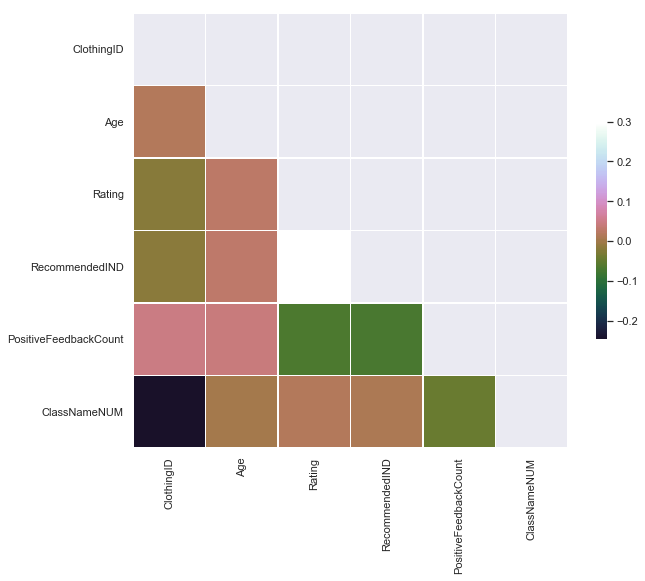

In [23]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="cubehelix", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

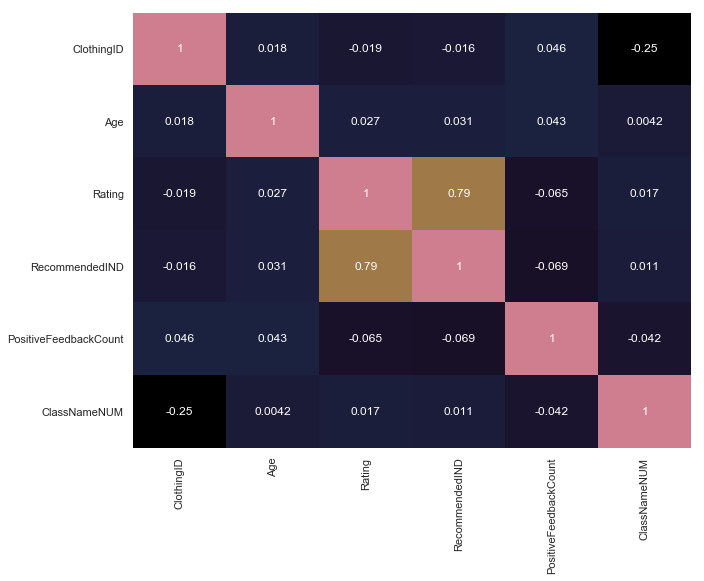

In [24]:
df.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data=df.corr(), cmap="cubehelix", annot= True, cbar=False, center= .8)
plt.show()

## Korelacja pomiędzy danymi numerycznymi w badanym zbiorze danych

- Na dwóch rodzajach wykresów sprawdzono korelację pomiędzy wymiarami w badanym zbiorze danych
- Nie można wskazać wymiarów, które byłyby silnie skorelowane

### Dwa słowa o rozkładzie wieku wśród klientów, którzy ocenili nasze produkty.

In [25]:
ndf = df[['Rating','AgeInterval']]
P = ndf.groupby('AgeInterval')['Rating'].count().reset_index()
ndf.groupby('AgeInterval').count().reset_index()
P['Percentage'] = 100 * P['Rating']  / P['Rating'].sum()
print(P)

  AgeInterval  Rating  Percentage
0     (0, 10]       0    0.000000
1    (10, 20]     152    0.647553
2    (20, 30]    3186   13.573041
3    (30, 40]    7912   33.706812
4    (40, 50]    5908   25.169344
5    (50, 60]    3891   16.576492
6    (60, 70]    2057    8.763260
7    (70, 80]     281    1.197120
8    (80, 90]      86    0.366378


Przedział od 20 do 70 lat obejmuje 96% rekordów w naszej bazie.


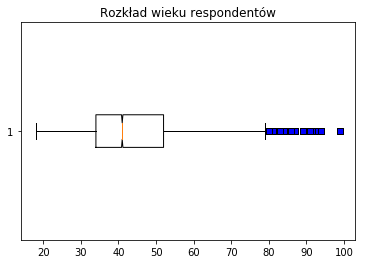

In [5]:
color = dict(markerfacecolor='b', marker='s')
fig2, ax2 = plt.subplots()
ax2.set_title('Rozkład wieku respondentów')
ax2.boxplot(df["Age"], notch=True, vert=False, flierprops=color)
plt.show()

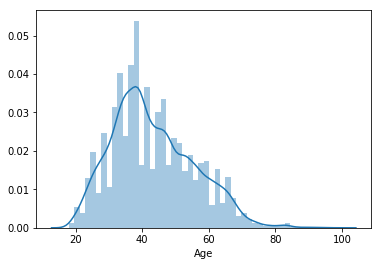

In [16]:
sns.distplot(df["Age"])
plt.show()

### Rating jako miara zadowolenia

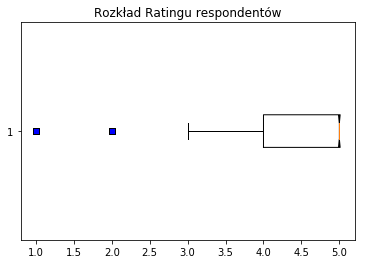

In [17]:
color = dict(markerfacecolor='b', marker='s')
fig2, ax2 = plt.subplots()
ax2.set_title('Rozkład Ratingu respondentów')
ax2.boxplot(df["Rating"], notch=True, vert=False, flierprops=color)
plt.show()

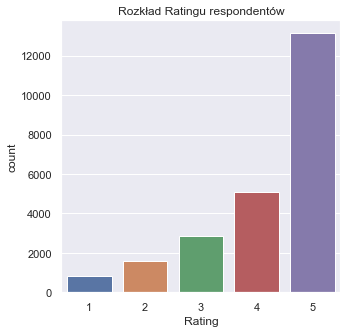

In [6]:
sns.set(rc={'figure.figsize':(5,5)})
plt.title('Rozkład Ratingu respondentów')
sns.countplot(x = 'Rating', data = df);

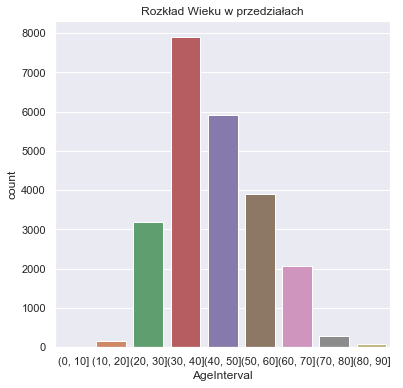

In [8]:
sns.set(rc={'figure.figsize':(6,6)})
plt.title('Rozkład Wieku w przedziałach')
sns.countplot(x = 'AgeInterval', data = df)

In [7]:
ndf = df.loc[(df['Age'] > 20) & (df['Age'] <= 70)]
ndf = ndf[['Rating','AgeInterval']]
gndf = ndf.groupby(['AgeInterval','Rating']).size()
gndf.groupby(level = [0]).transform(sum)
gndf / gndf.groupby(level = [0]).transform(sum)*100

AgeInterval  Rating
(20, 30]     1          3.452605
             2          6.591337
             3         13.433773
             4         20.935342
             5         55.586943
(30, 40]     1          3.538928
             2          7.128413
             3         12.815976
             4         22.143579
             5         54.373104
(40, 50]     1          3.537576
             2          7.109005
             3         12.677725
             4         22.494922
             5         54.180772
(50, 60]     1          3.829350
             2          5.988178
             3         10.562837
             4         20.997173
             5         58.622462
(60, 70]     1          3.646087
             2          5.153136
             3         10.500729
             4         19.834711
             5         60.865338
dtype: float64

<Figure size 288x288 with 0 Axes>

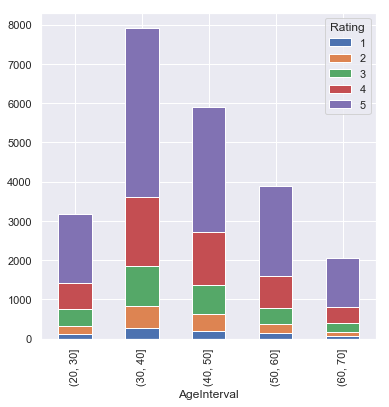

In [19]:
plt.figure(figsize=(4,4))
ndf.groupby(['Rating', 'AgeInterval']).size().unstack(0).plot.bar(stacked=True)
plt.show()

<Figure size 144x720 with 0 Axes>

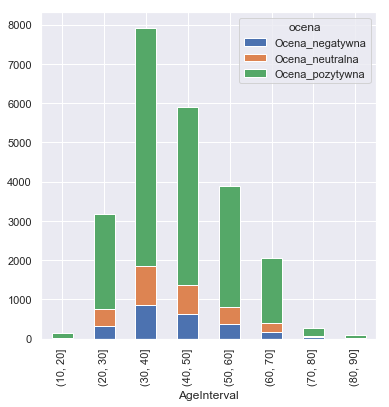

In [20]:
plt.figure(figsize=(2,10))
df.groupby(['ocena', 'AgeInterval']).size().unstack(0).plot.bar(stacked=True)
plt.show()

Struktura ocen wewnątrz przedziałów jest zbliżona.

Struktura ocen:
- około 80% to oceny pozytywne
- 10% to oceny neutralne
- 10% to oceny negatyne

### Rozkład opinii według struktury produktów w sklepie

- DZIAŁ
- DEPARTAMENT
- KLASA ODZIEŻY

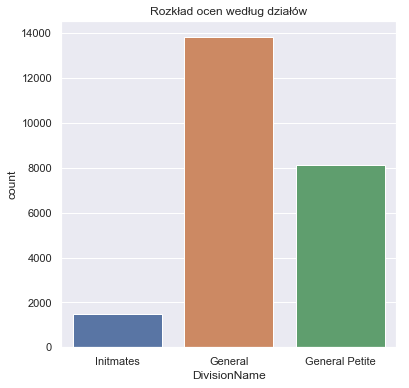

In [10]:
sns.set(rc={'figure.figsize':(6,6)})
plt.title('Rozkład ocen według działów')
sns.countplot(x = 'DivisionName', data = df)
plt.show()

<Figure size 144x720 with 0 Axes>

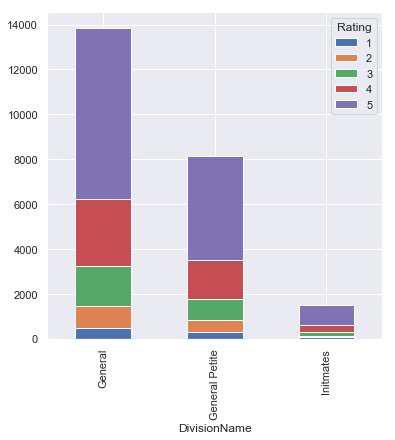

In [11]:
plt.figure(figsize=(2,10))
df.groupby(['Rating', 'DivisionName']).size().unstack(0).plot.bar(stacked=True)
plt.show()

<Figure size 144x720 with 0 Axes>

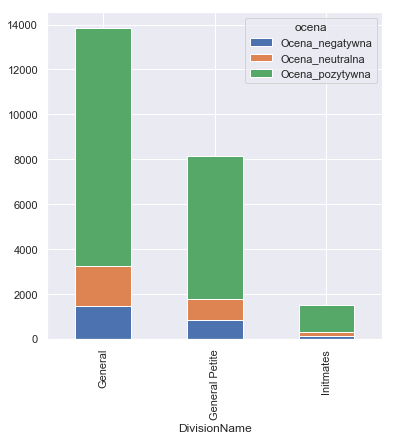

In [12]:
plt.figure(figsize=(2,10))
df.groupby(['ocena', 'DivisionName']).size().unstack(0).plot.bar(stacked=True)
plt.show()

<Figure size 144x720 with 0 Axes>

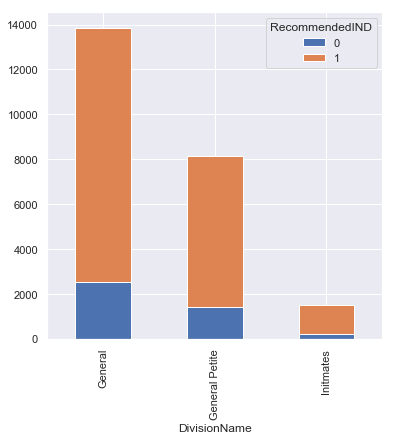

In [21]:
plt.figure(figsize=(2,10))
df.groupby(['RecommendedIND', 'DivisionName']).size().unstack(0).plot.bar(stacked=True)
plt.show()

In [22]:
ndf = df[['Rating','DivisionName']]
P = ndf.groupby('DivisionName')['Rating'].count().reset_index()
ndf.groupby('DivisionName').count().reset_index()
P['Percentage'] = 100 * P['Rating']  / P['Rating'].sum()
print(P)

     DivisionName  Rating  Percentage
0         General   13850   59.006476
1  General Petite    8120   34.594410
2       Initmates    1502    6.399114


In [23]:

ndf = df[['ocena','DivisionName']]
gndf = ndf.groupby(['DivisionName','ocena']).size()
gndf.groupby(level = [0]).transform(sum)
gndf / gndf.groupby(level = [0]).transform(sum)*100

DivisionName    ocena          
General         Ocena_negatywna    10.476534
                Ocena_neutralna    12.801444
                Ocena_pozytywna    76.722022
General Petite  Ocena_negatywna    10.160099
                Ocena_neutralna    11.613300
                Ocena_pozytywna    78.226601
Initmates       Ocena_negatywna     8.721704
                Ocena_neutralna    10.319574
                Ocena_pozytywna    80.958722
dtype: float64

In [24]:
ndf = df[['RecommendedIND','DivisionName']]
gndf = ndf.groupby(['DivisionName','RecommendedIND']).size()
gndf.groupby(level = [0]).transform(sum)
gndf / gndf.groupby(level = [0]).transform(sum)*100

DivisionName    RecommendedIND
General         0                 18.317690
                1                 81.682310
General Petite  0                 17.401478
                1                 82.598522
Initmates       0                 14.780293
                1                 85.219707
dtype: float64

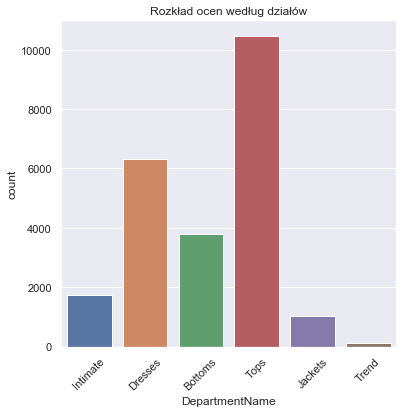

In [25]:
sns.set(rc={'figure.figsize':(6,6)})
plt.title('Rozkład ocen według działów')
chart = (sns.countplot(x = 'DepartmentName', data = df))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

<Figure size 144x720 with 0 Axes>

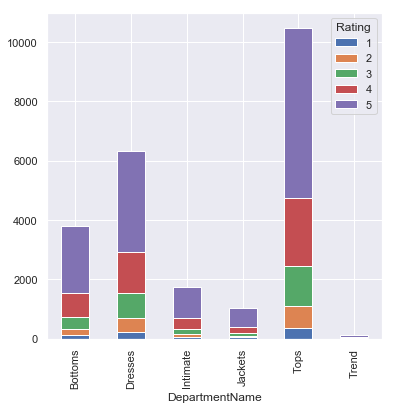

In [26]:
plt.figure(figsize=(2,10))
df.groupby(['Rating', 'DepartmentName']).size().unstack(0).plot.bar(stacked=True)
plt.show()

<Figure size 144x720 with 0 Axes>

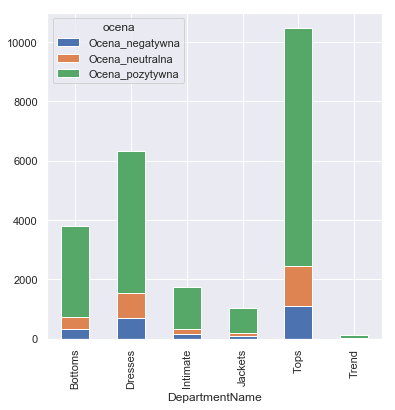

In [27]:
plt.figure(figsize=(2,10))
df.groupby(['ocena', 'DepartmentName']).size().unstack(0).plot.bar(stacked=True)
plt.show()

<Figure size 144x720 with 0 Axes>

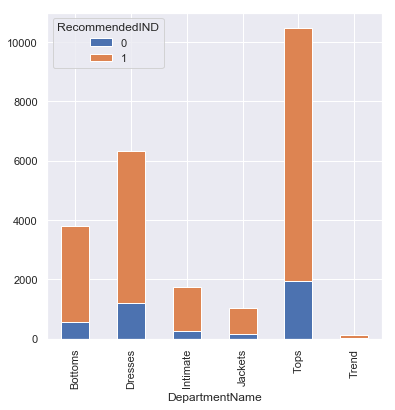

In [28]:
plt.figure(figsize=(2,10))
df.groupby(['RecommendedIND', 'DepartmentName']).size().unstack(0).plot.bar(stacked=True)
plt.show()

In [29]:
ndf = df[['Rating','DepartmentName']]
P = ndf.groupby('DepartmentName')['Rating'].count().reset_index()
ndf.groupby('DepartmentName').count().reset_index()
P['Percentage'] = 100 * P['Rating']  / P['Rating'].sum()
print(P)

  DepartmentName  Rating  Percentage
0        Bottoms    3799   16.185242
1        Dresses    6319   26.921438
2       Intimate    1735    7.391786
3        Jackets    1032    4.396728
4           Tops   10468   44.597819
5          Trend     119    0.506987


In [30]:
ndf = df[['ocena','DepartmentName']]
gndf = ndf.groupby(['DepartmentName','ocena']).size()
gndf.groupby(level = [0]).transform(sum)
gndf / gndf.groupby(level = [0]).transform(sum)*100

DepartmentName  ocena          
Bottoms         Ocena_negatywna     8.423269
                Ocena_neutralna    11.081864
                Ocena_pozytywna    80.494867
Dresses         Ocena_negatywna    10.903624
                Ocena_neutralna    13.261592
                Ocena_pozytywna    75.834784
Intimate        Ocena_negatywna     8.818444
                Ocena_neutralna    10.259366
                Ocena_pozytywna    80.922190
Jackets         Ocena_negatywna    10.562016
                Ocena_neutralna     8.817829
                Ocena_pozytywna    80.620155
Tops            Ocena_negatywna    10.641956
                Ocena_neutralna    12.648070
                Ocena_pozytywna    76.709973
Trend           Ocena_negatywna    18.487395
                Ocena_neutralna    15.966387
                Ocena_pozytywna    65.546218
dtype: float64

In [31]:
ndf = df[['RecommendedIND','DepartmentName']]
gndf = ndf.groupby(['DepartmentName','RecommendedIND']).size()
gndf.groupby(level = [0]).transform(sum)
gndf / gndf.groupby(level = [0]).transform(sum)*100

DepartmentName  RecommendedIND
Bottoms         0                 14.872335
                1                 85.127665
Dresses         0                 19.180250
                1                 80.819750
Intimate        0                 14.985591
                1                 85.014409
Jackets         0                 16.375969
                1                 83.624031
Tops            0                 18.484906
                1                 81.515094
Trend           0                 26.050420
                1                 73.949580
dtype: float64

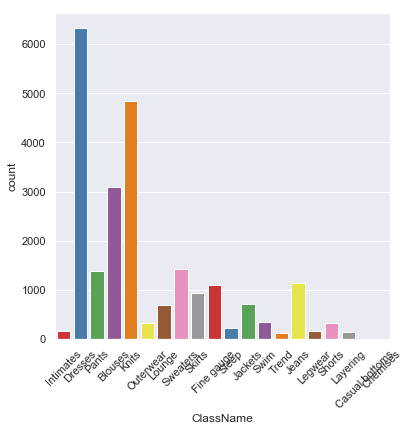

In [32]:
chart = sns.countplot(
    data=df,
    x='ClassName',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

<Figure size 144x720 with 0 Axes>

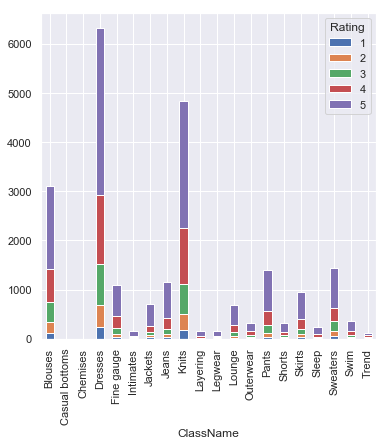

In [33]:
plt.figure(figsize=(2,10))
df.groupby(['Rating', 'ClassName']).size().unstack(0).plot.bar(stacked=True)
plt.show()

<Figure size 720x1440 with 0 Axes>

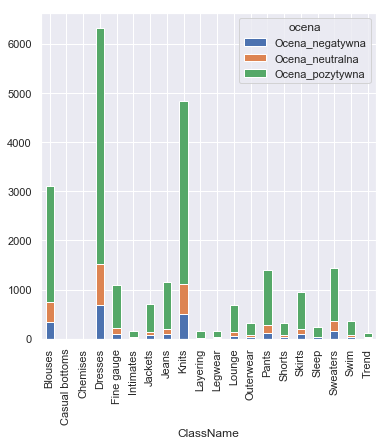

In [34]:
plt.figure(figsize=(10,20))
df.groupby(['ocena', 'ClassName']).size().unstack(0).plot.bar(stacked=True)
plt.show()

<Figure size 144x720 with 0 Axes>

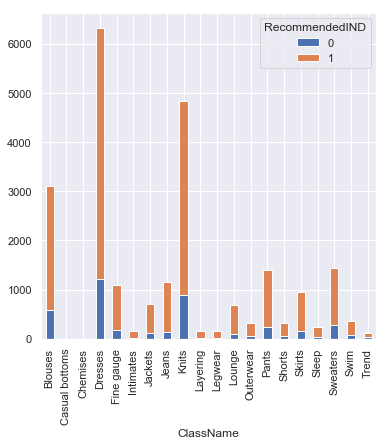

In [35]:
plt.figure(figsize=(2,10))
df.groupby(['RecommendedIND', 'ClassName']).size().unstack(0).plot.bar(stacked=True)
plt.show()

In [48]:
ndf = df[['Rating','ClassName']]
P = ndf.groupby('ClassName')['Rating'].count().reset_index()
ndf.groupby('ClassName').count().reset_index()
P['Percentage'] = 100 * P['Rating']  / P['Rating'].sum()
print(P)
  
#df.plot(x='Airport', kind='barh', stacked=True, title='Breakdown of Costs', mark_right=True)

         ClassName  Rating  Percentage
0          Blouses    3097   13.194444
1   Casual bottoms       2    0.008521
2         Chemises       1    0.004260
3          Dresses    6319   26.921438
4       Fine gauge    1100    4.686435
5        Intimates     154    0.656101
6          Jackets     704    2.999318
7            Jeans    1147    4.886673
8            Knits    4843   20.633095
9         Layering     146    0.622018
10         Legwear     165    0.702965
11          Lounge     691    2.943933
12       Outerwear     328    1.397410
13           Pants    1388    5.913429
14          Shorts     317    1.350545
15          Skirts     945    4.026074
16           Sleep     228    0.971370
17        Sweaters    1428    6.083845
18            Swim     350    1.491138
19           Trend     119    0.506987


In [37]:
ndf = df[['ocena','ClassName']]
gndf = ndf.groupby(['ClassName','ocena']).size()
gndf.groupby(level = [0]).transform(sum)
gndf / gndf.groupby(level = [0]).transform(sum)*100

ClassName       ocena          
Blouses         Ocena_negatywna     11.236681
                Ocena_neutralna     12.721989
                Ocena_pozytywna     76.041330
Casual bottoms  Ocena_pozytywna    100.000000
Chemises        Ocena_pozytywna    100.000000
Dresses         Ocena_negatywna     10.903624
                Ocena_neutralna     13.261592
                Ocena_pozytywna     75.834784
Fine gauge      Ocena_negatywna      9.545455
                Ocena_neutralna     10.818182
                Ocena_pozytywna     79.636364
Intimates       Ocena_negatywna      9.740260
                Ocena_neutralna     10.389610
                Ocena_pozytywna     79.870130
Jackets         Ocena_negatywna     10.369318
                Ocena_neutralna      8.806818
                Ocena_pozytywna     80.823864
Jeans           Ocena_negatywna      7.410636
                Ocena_neutralna     10.026155
                Ocena_pozytywna     82.563208
Knits           Ocena_negatywna     10.448069
  

In [38]:
ndf = df[['RecommendedIND','ClassName']]
gndf = ndf.groupby(['ClassName','RecommendedIND']).size()
gndf.groupby(level = [0]).transform(sum)
gndf / gndf.groupby(level = [0]).transform(sum)*100

ClassName       RecommendedIND
Blouses         0                  18.986116
                1                  81.013884
Casual bottoms  1                 100.000000
Chemises        1                 100.000000
Dresses         0                  19.180250
                1                  80.819750
Fine gauge      0                  16.272727
                1                  83.727273
Intimates       0                  14.285714
                1                  85.714286
Jackets         0                  15.482955
                1                  84.517045
Jeans           0                  11.857018
                1                  88.142982
Knits           0                  18.232501
                1                  81.767499
Layering        0                  11.643836
                1                  88.356164
Legwear         0                  13.939394
                1                  86.060606
Lounge          0                  14.037627
                1       

In [39]:
df1 = df.groupby(["ClothingID"]).size().reset_index(name="Liczebnosc").sort_values(['Liczebnosc'], ascending=False)
df1 = df1[:25]
print(df1)

      ClothingID  Liczebnosc
1078        1078        1024
862          862         806
1094        1094         756
1081        1081         582
872          872         545
829          829         527
1110        1110         480
868          868         430
895          895         404
936          936         358
867          867         351
850          850         338
1095        1095         327
863          863         306
1077        1077         297
1059        1059         294
1086        1086         291
1080        1080         289
860          860         288
1083        1083         249
861          861         244
873          873         238
828          828         225
1092        1092         220
1033        1033         220


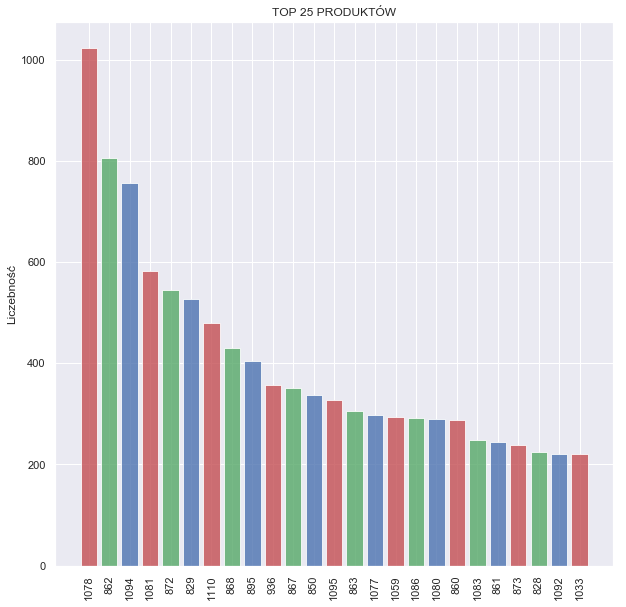

In [40]:
produkty = df1['ClothingID']
Liczebnosc = df1['Liczebnosc']
plt.rcParams['figure.figsize'] = (10,10)
y_pos = np.arange(len(produkty))
plt.bar(y_pos,Liczebnosc, align = 'center', alpha = 0.8, color=['r', 'g', 'b'])
plt.xticks(y_pos, produkty, rotation = 'vertical')
plt.ylabel('Liczebność')
plt.title('TOP 25 PRODUKTÓW')
plt.show()

In [41]:
 df.pivot_table(values='Rating', index=['ClothingID'], aggfunc='sum')

,Rating
ClothingID,
0,5
1,12
2,4
3,5
4,5
5,5
6,5
7,5
8,25


In [42]:
df2 = df.groupby('ClothingID').agg({'Rating':sum,'ClothingID':'count'}).rename(columns={'Rating':'suma_rating','ClothingID':'count'})
df2['sredni_rating'] = df2['suma_rating']/df2['count']
df2.describe()

,suma_rating,count,sredni_rating
count,1206.000000,1206.000000,1206.000000
mean,81.714760,19.474295,4.198540
std,291.167303,69.009764,0.849258
min,1.000000,1.000000,1.000000
25%,5.000000,1.000000,4.000000
50%,9.000000,2.000000,4.333333
75%,26.000000,6.750000,5.000000
max,4305.000000,1024.000000,5.000000


C:\Users\irekt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\irekt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


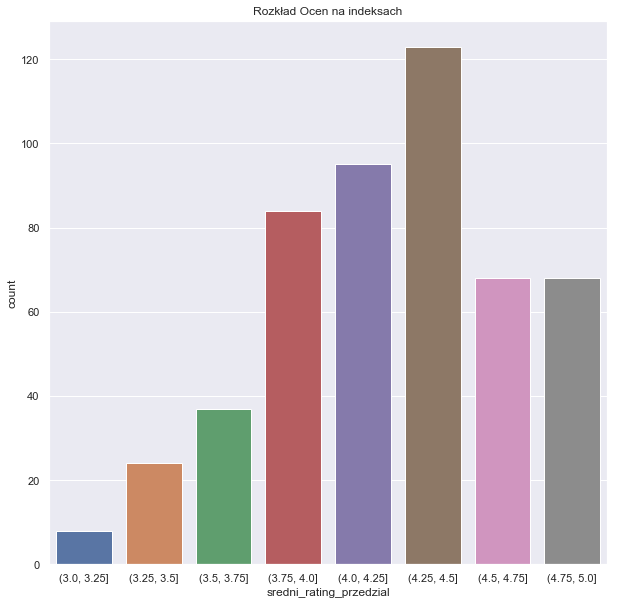

In [43]:

df3 = df2[df2['count'] > 2]
df3.sort_values("sredni_rating", inplace=True)

df4 = df3[df3['sredni_rating'] >=3]
df4['sredni_rating_przedzial'] = pd.cut(df4['sredni_rating'], np.arange(start=3, stop=5.25, step=0.25))
sns.set(rc={'figure.figsize':(10,10)})
plt.title('Rozkład Ocen na indeksach')
sns.countplot(x = 'sredni_rating_przedzial', data = df4)

C:\Users\irekt\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


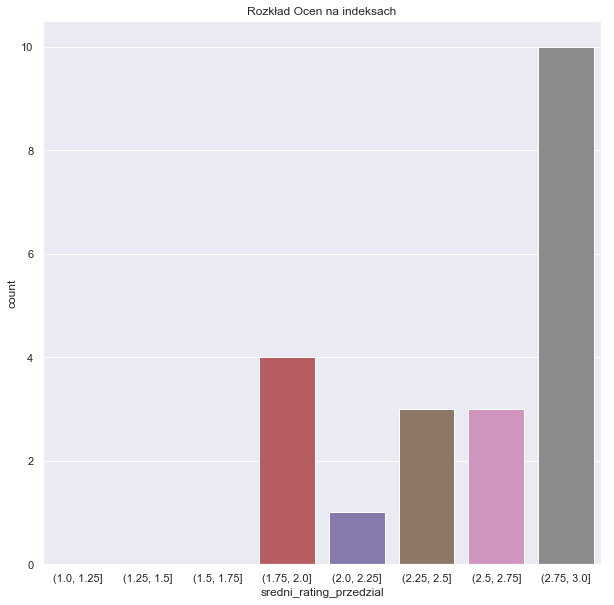

In [44]:
df4 = df3[df3['sredni_rating'] <=3]
df4['sredni_rating_przedzial'] = pd.cut(df4['sredni_rating'], np.arange(start=1, stop=3.25, step=0.25))
sns.set(rc={'figure.figsize':(10,10)})
plt.title('Rozkład Ocen na indeksach')
sns.countplot(x = 'sredni_rating_przedzial', data = df4)

In [ ]:
df4